# Payment Classification

The goal of this project is trying to build an algorithm to automatically test if a given payment information description belongs to the following three categories respectively: `is_productive`, `use_salaries`, and `use_hours`. These categories are independent, which means a specific payment can belong to more than one categories. 

In [2]:
ls data

README.md          paycode_data.xlsx


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1 - Data Preprocessing

Read Data: 

In [9]:
data = pd.read_excel('data/paycode_data.xlsx')
data.head()

,report_id,pay_type_id,pay_type_description,Total_Dollars,Total_Hours,Hourly Rate,cr255210db1_pay_pay_types.is_productive,cr255210db1_pay_pay_types.use_salaries,cr255210db1_pay_pay_types.use_hours
0,87,101,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,87,102,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,87,104,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,87,105,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,87,201,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


The first two columns seems useless, so let's remove (aka "drop") them: 

In [13]:
data = data.drop(["report_id", "pay_type_id"], axis = 1); 
data.head()

,pay_type_description,Total_Dollars,Total_Hours,Hourly Rate,cr255210db1_pay_pay_types.is_productive,cr255210db1_pay_pay_types.use_salaries,cr255210db1_pay_pay_types.use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


Also, the last three column names seems a little messy. We can rename them: 

In [15]:
data.columns = ['pay_type_description', 'total_dollars', 'total_hours', 'hourly_rate', 'is_productive', 'use_salaries', 'use_hours']
data.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


# Step 2 - Split Data into Training and Testing

In [36]:
total = len(data)
total

62391

We'll just use the 80/20 ratio for training and testing: 

In [42]:
train = data.iloc[ : int(total*0.8)]
train.tail()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
49907,B12 BNS RET 12,10000.00,0.0,0.0,0,1,0
49908,BN9 BNS OTS,308285.00,0.0,0.0,0,1,0
49909,BNA BNSANNUAL,7062.64,0.0,0.0,0,1,0
49910,BNC BNSQUARTER,550.00,0.0,0.0,0,1,0
49911,BNE BNSSODOH,50000.00,0.0,0.0,0,1,0


In [44]:
test = data.iloc[int(total*0.8):]
test.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
49912,CEC MISCCOMP,8898.83,0.0,0.0,0,1,0
49913,Imputed Income,12627.00,0.0,0.0,0,1,0
49914,Med Direct,9100.00,0.0,0.0,0,1,0
49915,CHO HOUSECLRG,38736.00,0.0,0.0,0,1,0
49916,PT2 EIB,18502.45,0.0,0.0,0,1,0


# Step 3 - Classifier

In this step, we will be trying different classification approaches. 

<h3> 1. Total Dollars </h3>

There might be some correlation between the total dollar amount and the categories. So let's run some tests and see. 

<h3 style="color:green"> total_hours vs is_productive </h3>

### Training (Learning) 

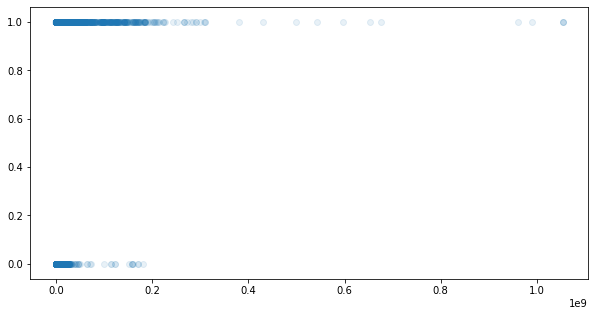

In [70]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)

It seems like that when the dollar amount gets large enough, it will fall into 1 (meaning IS productive). Let's find out more about the threshold. 

In [50]:
max_not_productive_amount = max(train[train.is_productive == 0].total_dollars)
max_not_productive_amount

181240153.41

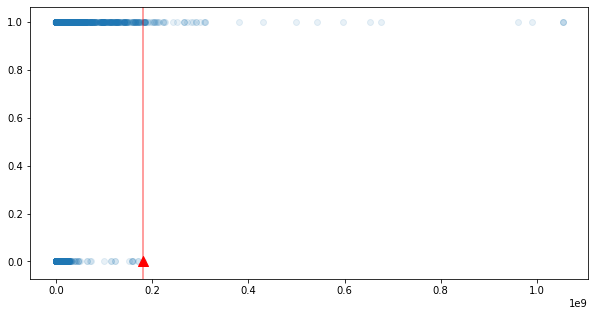

In [63]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)
plt.scatter(max_not_productive_amount, 0, marker = '^', c = "red", s = 100) 
plt.axvline(x = max_not_productive_amount, color = "red", alpha = 0.5)

Which means that to the right of the red verticle line, the payment is very likely productive. 

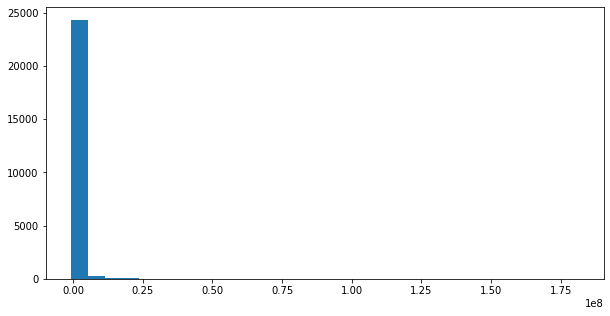

In [96]:
fig = plt.figure(figsize=(10, 5))
plt.hist(train[train.is_productive == 0].total_dollars, bins = 30); 

In [119]:
np.percentile(a = train[train.is_productive == 0].total_dollars, q = [25, 50, 75, 80, 90, 95])

array([   1893.46 ,   22893.49 ,  158085.16 ,  249589.368,  757784.136,
       1806148.05 ])

In [138]:
np.percentile(a = train[train.is_productive == 0].total_dollars, q = [99.9, 99.91, 99.92])

array([38455612.83772235, 41870477.160404  , 45303660.98975977])

We can set the approximate threshold value to be $45303660, marked by the green triangle in the graph below. Anything above that can be classified as `is_productive`. 

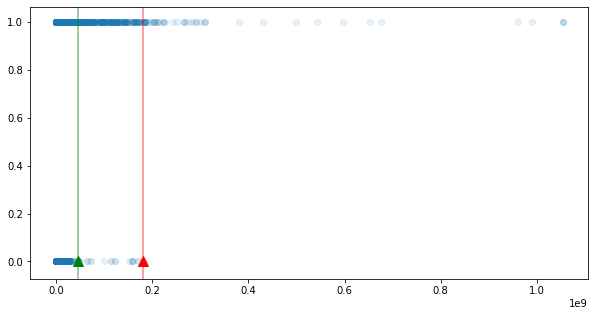

In [141]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)
plt.scatter(max_not_productive_amount, 0, marker = '^', c = "red", s = 100) 
plt.axvline(x = max_not_productive_amount, color = "red", alpha = 0.5)
plt.scatter(45303660, 0, marker = '^', c = "green", s = 100) 
plt.axvline(x = 45303660, color = "green", alpha = 0.5)

### Testing

In [162]:
def testing(threshold, attribute):
    prediction = []
    for amount in test.total_dollars:
        if amount > threshold: 
            prediction.append(1)
        else:
            prediction.append(0)
    
    count = len(prediction)
    if attribute == "is_productive": 
        truth = list(test.is_productive)
    elif attribute == "use_salaries":
        truth = list(test.use_salaries)
    elif attribute == "use_hours":
        truth = list(test.use_hours)
    correct_count = 0 
    for i in range(count):
        if prediction[i] == truth[i]:
            correct_count += 1
    print("The correct rate of classifier is: ", correct_count / count)

In [163]:
testing(45303660, "is_productive")

The correct rate of classifier is:  0.5629457488580816


Hmmm... Okay, 0.56, not too bad, but not very high either. 

<h3 style="color:green"> total_dollars vs use_salaris </h3>

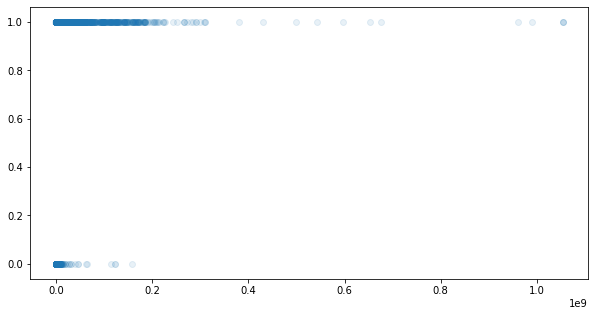

In [148]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_salaries, alpha = 0.1)

Okay, seems like a better correlation. 

In [158]:
threshold = np.percentile(a = train[train.use_salaries == 0].total_dollars, q = 99.7)
threshold

13888459.426900025

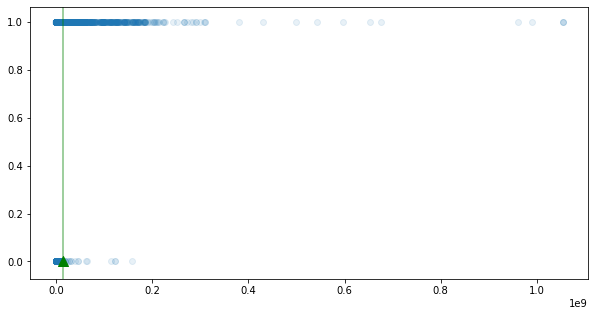

In [161]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_salaries, alpha = 0.1)
plt.scatter(threshold, 0, marker = '^', c = "green", s = 100) 
plt.axvline(x = threshold, color = "green", alpha = 0.5)

In [164]:
testing(threshold, "use_salaries")

The correct rate of classifier is:  0.18551165958810803


Whoa, okay. Very bad. 

<h3 style="color:green"> total_dollars vs use_hours </h3>

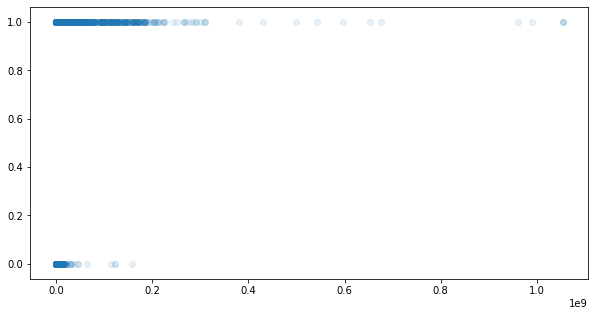

In [165]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_hours, alpha = 0.1)

The graph looks very similar to the total_dollars vs use_salaries graph. So it's probably not seperable. 